0:	learn: 0.4834711	test: 0.4876033	best: 0.4876033 (0)	total: 6.07ms	remaining: 12.1s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.6074380165
bestIteration = 141

Shrink model to first 142 iterations.
CatBoost Accuracy: 0.61
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.50      0.59        40
           1       0.45      0.37      0.41        41
           2       0.61      0.76      0.67        79
           3       0.85      0.79      0.81        42
           4       0.44      0.47      0.46        40

    accuracy                           0.61       242
   macro avg       0.61      0.58      0.59       242
weighted avg       0.61      0.61      0.60       242



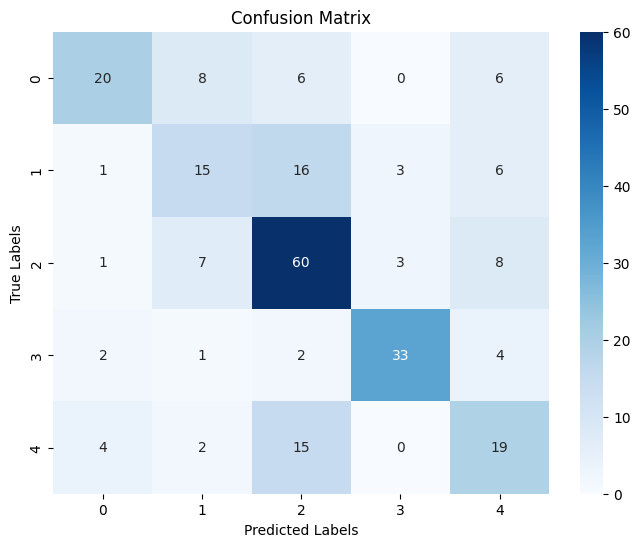

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from catboost import CatBoostClassifier

# Load dataset
file_path = "Dataset/processed_file.csv"
df = pd.read_csv(file_path)

# Selecting relevant features
X = df[['brand']].copy()

# Encoding categorical variables
X = pd.get_dummies(X, columns=['brand'])

# Adding binary encoded columns for notable effects and skin type
notable_effects_columns = [col for col in df.columns if col.startswith('notable_effects_')]
skin_type_columns = ['Sensitive', 'Combination', 'Oily', 'Dry', 'Normal']
X[notable_effects_columns + skin_type_columns] = df[notable_effects_columns + skin_type_columns]

# Scaling numerical features using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Encoding product_type
y = LabelEncoder().fit_transform(df['product_type'].astype(str))

# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Training CatBoost Classifier
catboost_classifier = CatBoostClassifier(
    iterations=2000,  # Increase iterations for better learning
    depth=8,  # Try deeper trees
    learning_rate=0.05,  # Lower learning rate with more iterations
    l2_leaf_reg=3,  # Regularization to prevent overfitting
    loss_function='MultiClass',
    random_seed=42,
    eval_metric="Accuracy",
    verbose=200
)

catboost_classifier.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=50, use_best_model=True)

# Making predictions
y_pred = catboost_classifier.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f'CatBoost Accuracy: {accuracy:.2f}')
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Compute and display confusion matrix for CatBoost
def plot_catboost_confusion_matrix(y_true, y_pred):
    """Plots a confusion matrix for a CatBoost model using Seaborn."""
    conf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=set(y_true), yticklabels=set(y_true))
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('CatBoost Confusion Matrix')
    plt.show()
